In [1]:
import pandas as pd 
import numpy as np 
import os 
import time 
import regex as re

In [2]:
from underthesea import word_tokenize

In [3]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [4]:
import regex as re
 
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
 
dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)


def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [5]:


 
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()

# Hàm chuyển Unicode dựng sẵn về Unicde tổ hợp (phổ biến hơn)
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]


nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            # for index2 in nguyen_am_index:
            #     if index2 != index:
            #         x, y = nguyen_am_to_ids[chars[index]]
            #         chars[index2] = bang_nguyen_am[x][0]
            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            # chars[nguyen_am_index[1]] = bang_nguyen_am[x][0]
        else:
            # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
        # chars[nguyen_am_index[0]] = bang_nguyen_am[x][0]
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
        # x, y = nguyen_am_to_ids[chars[nguyen_am_index[2]]]
        # chars[nguyen_am_index[2]] = bang_nguyen_am[x][0]
    return ''.join(chars)


def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True


def lowercase_remove_noise_character(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        words[index] = ''.join(cw)
    return ' '.join(words)

def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [7]:
# '''
# LOG: Get special character excel 
# '''
# log_excel_character = ""
# for index, row in df.iterrows():
#     string_get = row["Review"]
#     log_excel_character = string_get[82:89]
#     print(log_excel_character)
#     break
    

# **Clean Data**

In [6]:
def clean_data(dataframe, special_excel_character):   
    l_convert_string = []
    for index, row in dataframe.iterrows():
        review_str = row["Review"]
        if type(review_str) != str:
            continue
        #remove "\n", duplicate blank space
        clean_string = review_str.replace("\n","")
        clean_string = review_str.replace(special_excel_character,"")
        clean_string = " ".join(clean_string.split())

        #remove tag html
        clean_string = remove_html(clean_string)
        #remove emoji, special character
        clean_string = remove_emojis(clean_string)

        # format unicode
        unicode_string = covert_unicode(clean_string)
        #format vietnamese sign

        if len(unicode_string) <= 1:
            continue
        #lowcase
        sign_string = lowercase_remove_noise_character(unicode_string)
        #get only vietnamese character
        sign_string = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]','',sign_string)
        sign_string = " ".join(sign_string.split())
        #tokenize
        token_string = word_tokenize(sign_string, format="text")
        l_convert_string.append(token_string)
    return l_convert_string


# **ReClean and Merge dataset**

In [7]:
path_dataset = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/data20k-25k.xlsx"
df = pd.read_excel(path_dataset, sheet_name = 'Sheet1')

In [8]:
path_dataset2 = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Data/Data_0_5k_sentiment.xlsx"
df2 = pd.read_excel(path_dataset2, sheet_name = 'Dataset')

In [9]:
l_review = []
l_label = []

for index, row in df.iterrows():
    review = row["Review"]
    label = row["Label"]
    l_review.append(review)
    l_label.append(label)
    
for index, row in df2.iterrows():
    review = row["Review"]
    label = row["Label"]
    l_review.append(review)
    l_label.append(label)
    if index >= 5000:
        break
    

In [10]:
print(len(l_review))

10026


In [11]:

l_convert_review = []
l_convert_label = []
# nagative 0
# positive 1
# None 2

l_len_word = []
for index, review in enumerate(l_review):
    review_str = review
    label = l_label[index]
    if type(review_str) != str:
        print(type(review_str))
        continue
    #remove "\n", duplicate blank space
    clean_string = review_str.replace("\n","")
    clean_string = " ".join(clean_string.split())
    
    #remove tag html
    clean_string = remove_html(clean_string)
    #remove emoji, special character
    clean_string = remove_emojis(clean_string)
    
    # format unicode
    unicode_string = covert_unicode(clean_string)
    #format vietnamese sign
    
    if len(unicode_string) <= 1:
        continue
    sign_string = lowercase_remove_noise_character(unicode_string)
    sign_string = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]','',sign_string)
    sign_string = " ".join(sign_string.split())
    token_string = word_tokenize(sign_string, format="text")
    log_token = word_tokenize(sign_string)
    if len(token_string) <= 1:
        continue
    
    if label == "negative":
        label = 0
    elif label == "positive":
        label = 1
    else:
        label = 2
    l_len_word.append(len(log_token))
    l_convert_review.append(token_string)
    l_convert_label.append(label)

In [12]:
print(len(l_convert_review))

10023


In [114]:
# print(l_convert_review[:100])

In [115]:
save_df = pd.DataFrame(columns=["Review", "Label"])
save_df["Review"] = l_convert_review
save_df["Label"] = l_convert_label
save_df.to_excel("Merge_0-5k_20-25k.xlsx",sheet_name='Dataset',index = True)

# **EDA DATA**

In [13]:
#Log freq word in all labels
dictionary_all = {}
for index, sentence in enumerate(l_convert_review):
#     if l_label[index] == 2:
    tmp = sentence.split(" ")
    for word in tmp:
        if word in dictionary_all:
            dictionary_all[word] += 1
        else:
            dictionary_all[word] = 1
sorted_freq_all = {k: v for k, v in sorted(dictionary_all.items(), key=lambda item: item[1],reverse=True)}


In [14]:
#Log in negative
dictionary_negative = {}
for index, sentence in enumerate(l_convert_review):
    if l_convert_label[index] == 0:
        tmp = sentence.split(" ")
        for word in tmp:
            if word in dictionary_negative:
                dictionary_negative[word] += 1
            else:
                dictionary_negative[word] = 1
sorted_freq_negative = {k: v for k, v in sorted(dictionary_negative.items(), key=lambda item: item[1],reverse=True)}

In [15]:
#Log in positive
dictionary_positive = {}
for index, sentence in enumerate(l_convert_review):
    if l_convert_label[index] == 1:
        tmp = sentence.split(" ")
        for word in tmp:
            if word in dictionary_positive:
                dictionary_positive[word] += 1
            else:
                dictionary_positive[word] = 1
sorted_freq_positive = {k: v for k, v in sorted(dictionary_positive.items(), key=lambda item: item[1],reverse=True)}


In [16]:
#Log in None
dictionary_none = {}
for index, sentence in enumerate(l_convert_review):
    if l_convert_label[index] == 2:
        tmp = sentence.split(" ")
        for word in tmp:
            if word in dictionary_none:
                dictionary_none[word] += 1
            else:
                dictionary_none[word] = 1
sorted_freq_none = {k: v for k, v in sorted(dictionary_none.items(), key=lambda item: item[1],reverse=True)}


In [17]:
#Log top 30
log_freq = []
log_ratio = []
log_freq_negative = []
log_freq_positive = []
log_freq_none = []
count = 0
for key in sorted_freq_all.keys():
    count += 1
    if count >= 30:
        break
    freq_total = sorted_freq_all[key]
    freq_negative = sorted_freq_negative[key]
    freq_positive = sorted_freq_positive[key]
    if key not in sorted_freq_none:
        freq_non = 0
    else:
        freq_non = sorted_freq_none[key]
    ratio = freq_negative / freq_positive
    log_freq_negative.append(freq_negative)
    log_freq_positive.append(freq_positive)
    log_freq_none.append(freq_non)
    log_freq.append(key)
    

# **Plot bar char**

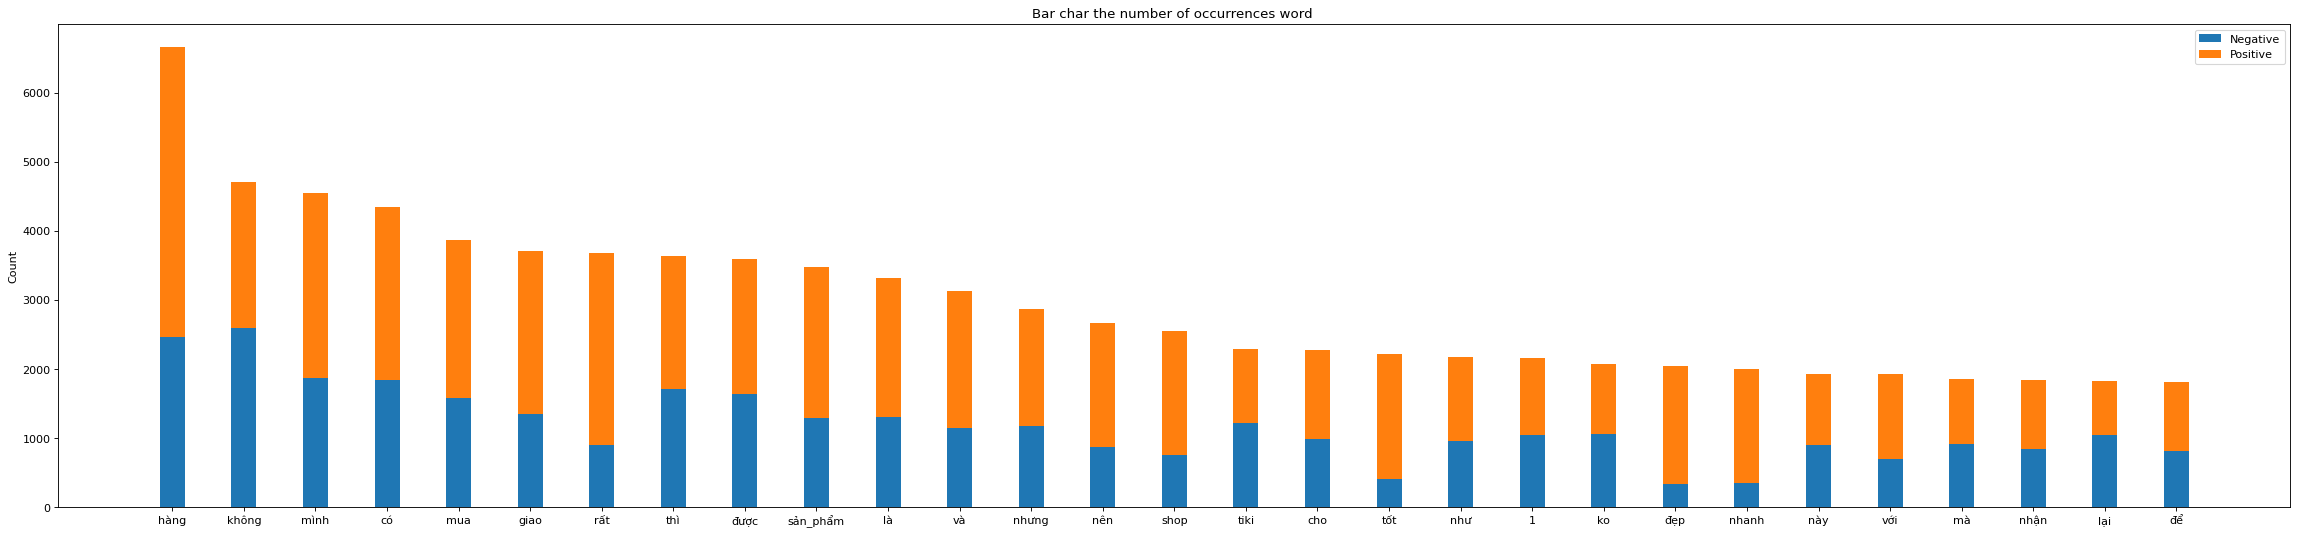

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 24), dpi=800)
# plt.rcParams.update({'font.size': 18})
ind = np.arange(len(log_freq_negative))
width = 0.35

fig = plt.subplots(figsize =(36, 8), dpi=80)


p1 = plt.bar(ind, log_freq_negative, width)
p2 = plt.bar(ind, log_freq_positive, width, bottom = log_freq_negative)

plt.ylabel('Count')

plt.title('Bar char the number of occurrences word ')
plt.xticks(ind, log_freq)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Negative', 'Positive'))

plt.show()


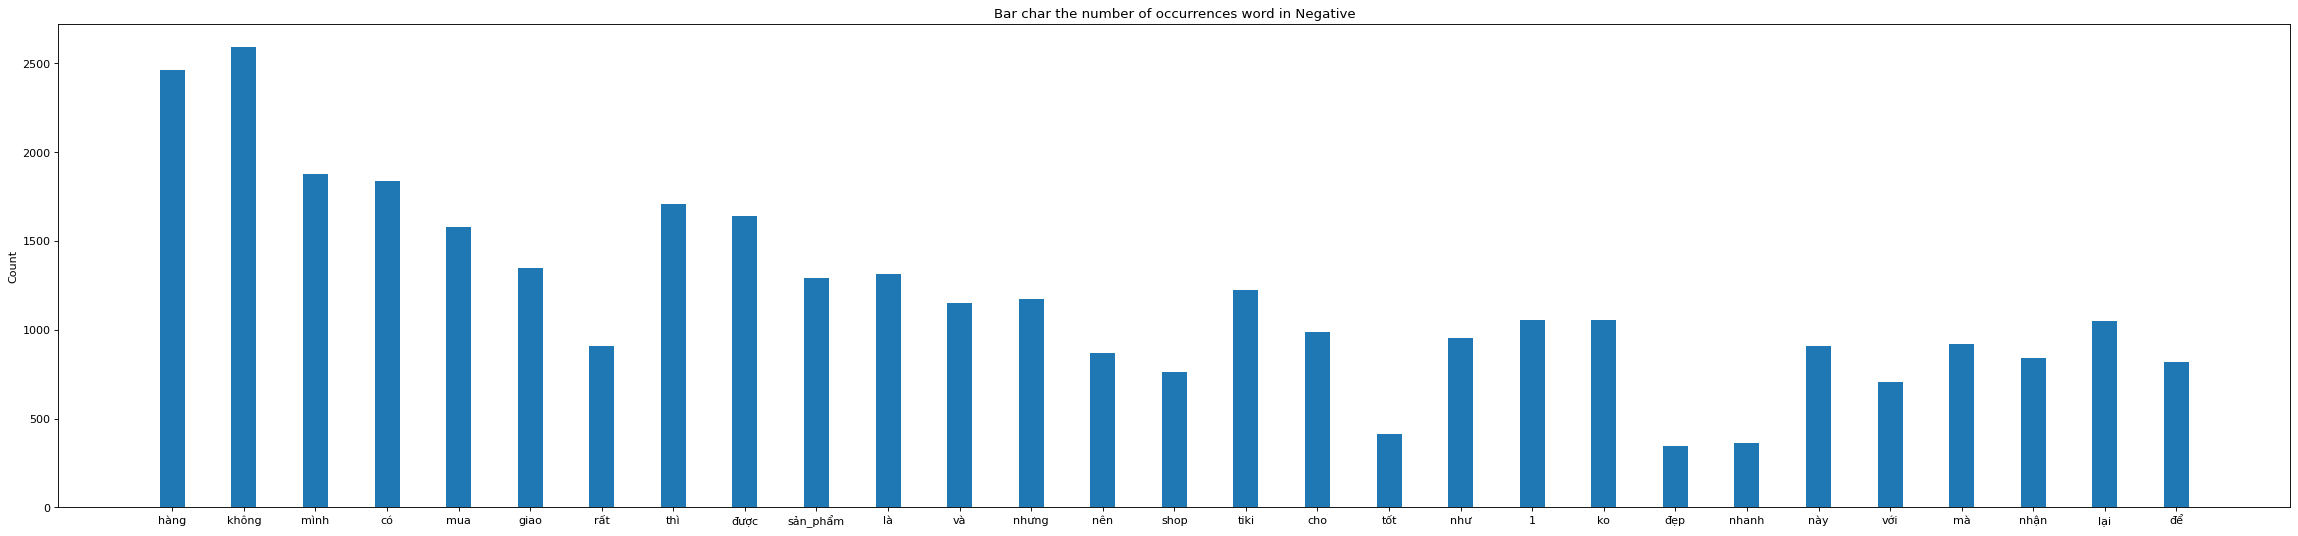

In [19]:
import numpy as np
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 24), dpi=800)
# plt.rcParams.update({'font.size': 18})
ind = np.arange(len(log_freq_negative))
width = 0.35

fig = plt.subplots(figsize =(36, 8), dpi=80)


p1 = plt.bar(ind, log_freq_negative, width)

plt.ylabel('Count')

plt.title('Bar char the number of occurrences word in Negative')
plt.xticks(ind, log_freq)


plt.show()


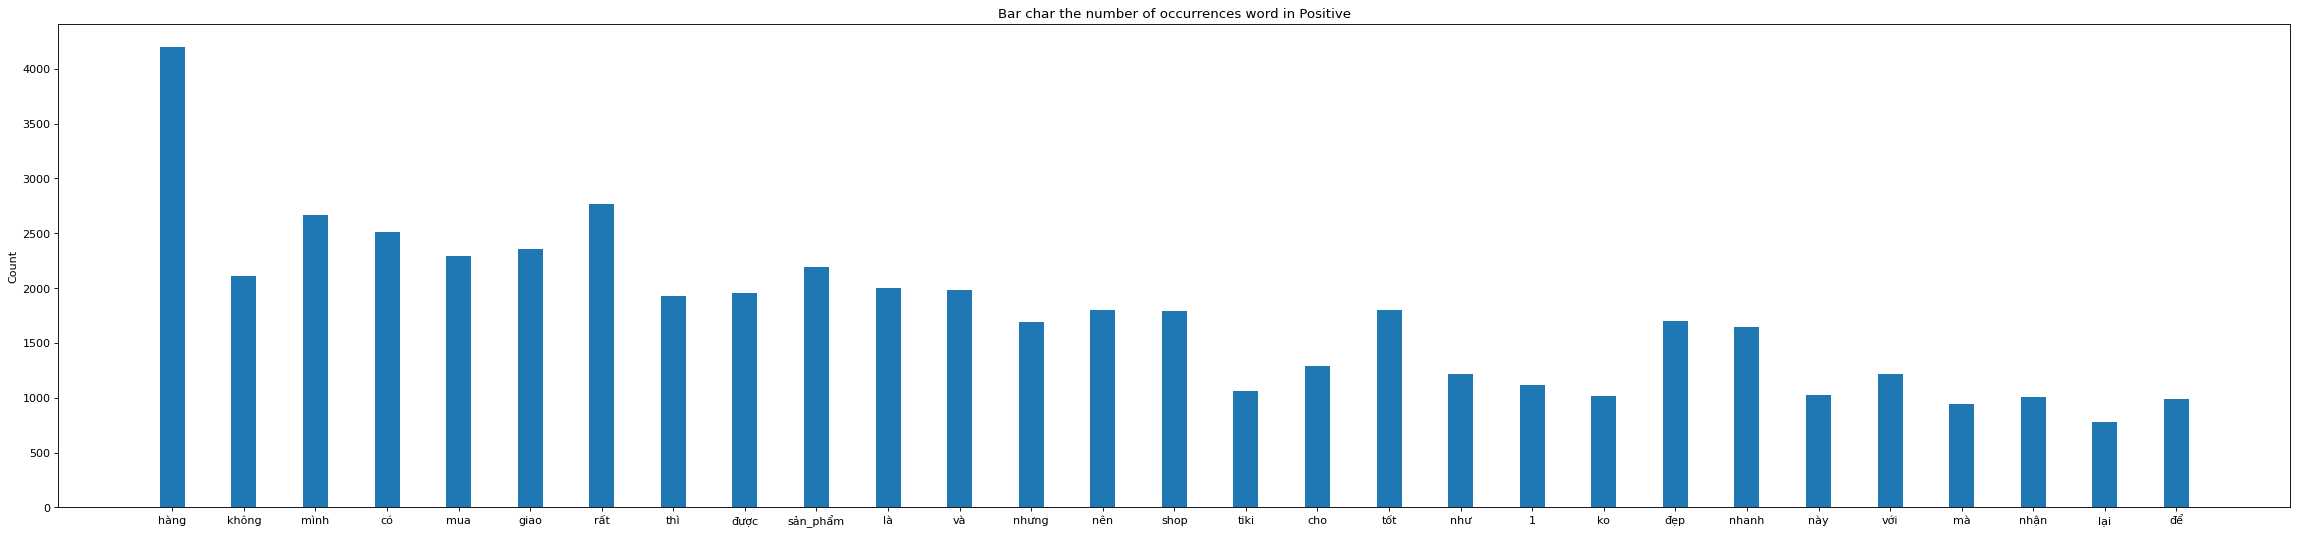

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 24), dpi=800)
# plt.rcParams.update({'font.size': 18})
ind = np.arange(len(log_freq_positive))
width = 0.35

fig = plt.subplots(figsize =(36, 8), dpi=80)


p1 = plt.bar(ind, log_freq_positive, width)

plt.ylabel('Count')

plt.title('Bar char the number of occurrences word in Positive')
plt.xticks(ind, log_freq)

plt.show()


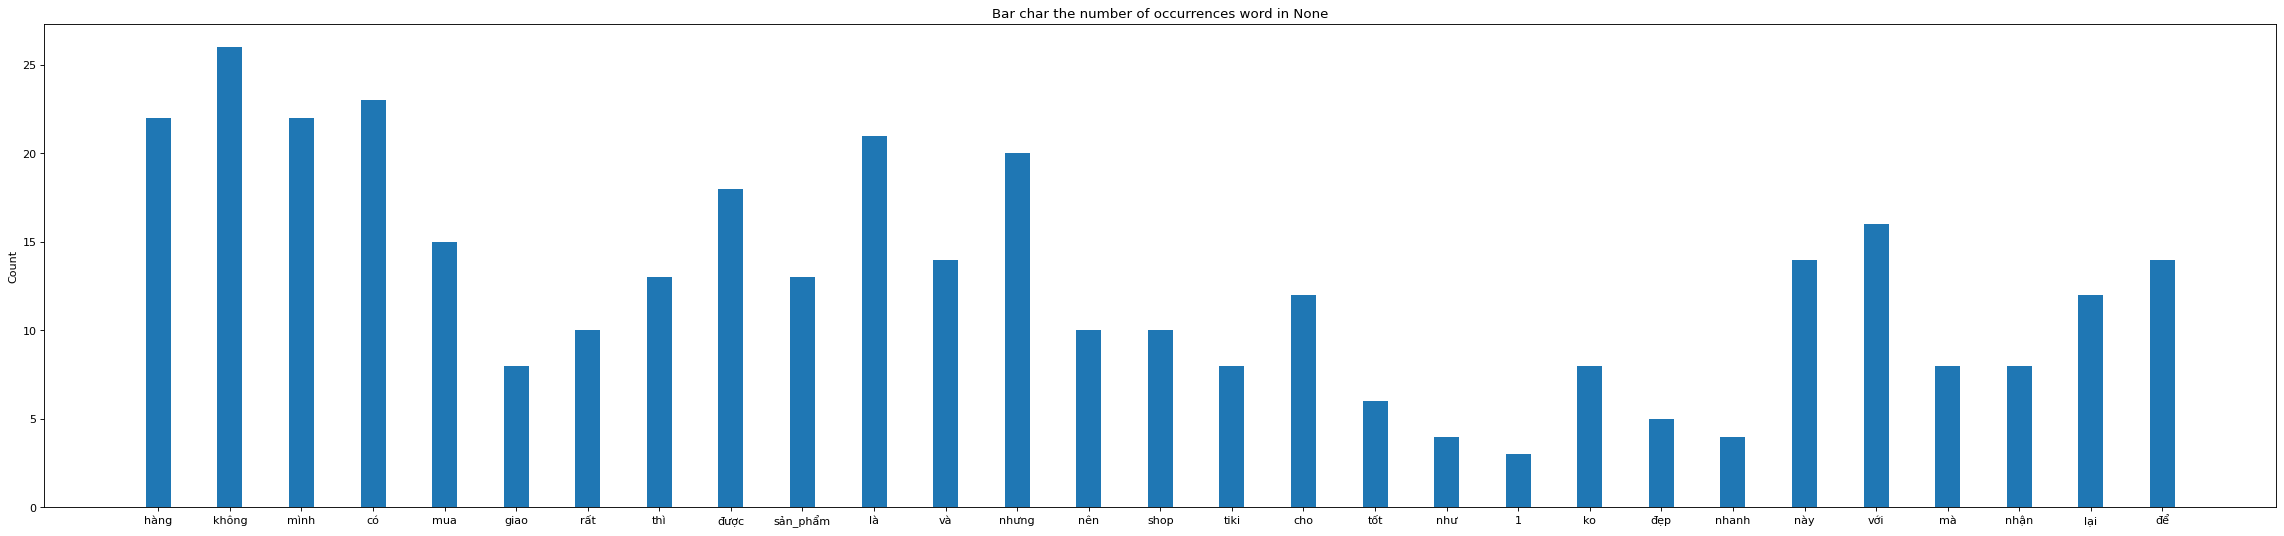

In [21]:
import numpy as np
import matplotlib.pyplot as plt
ind = np.arange(len(log_freq_none))
width = 0.35

fig = plt.subplots(figsize =(36, 8), dpi=80)


p1 = plt.bar(ind, log_freq_none, width)

plt.ylabel('Count')

plt.title('Bar char the number of occurrences word in None')
plt.xticks(ind, log_freq)

plt.show()


# **PLot Histogram**

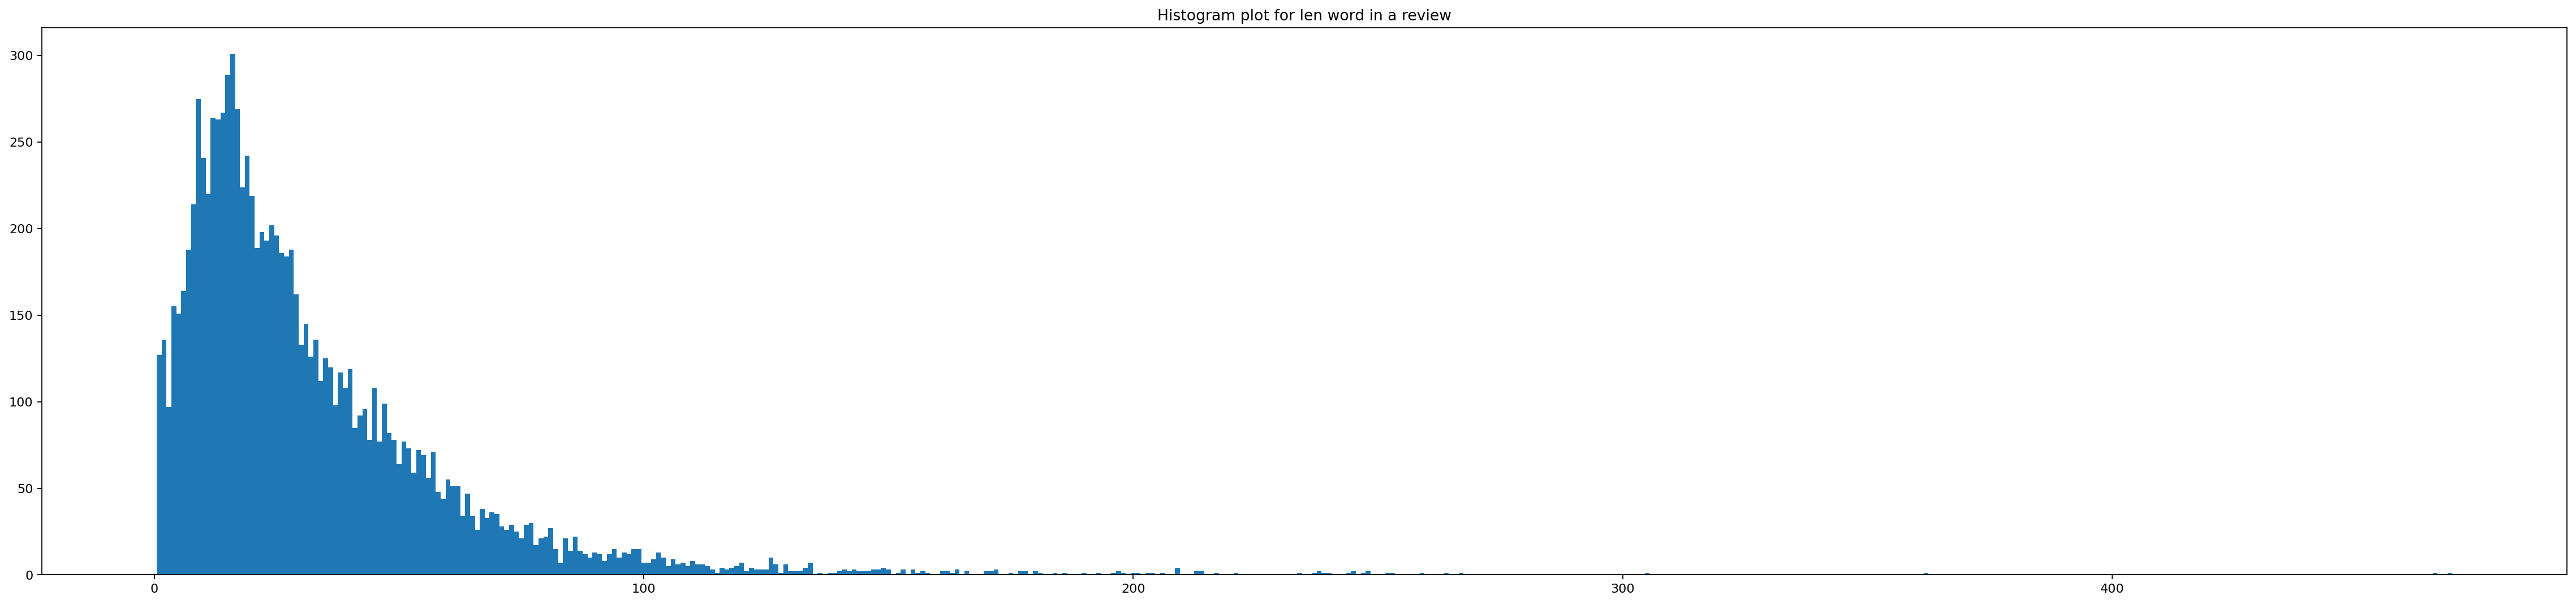

In [22]:
#Histogram plot for len word in a review

review_data = np.array(l_len_word)
fig = plt.figure(figsize =(36, 8), dpi=160)
d = np.diff(np.unique(review_data)).min()
left_of_first_bin = review_data.min() - float(d)/2
right_of_last_bin = review_data.max() + float(d)/2
plt.title('Histogram plot for len word in a review')
plt.hist(review_data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

# **Plot Box plot**

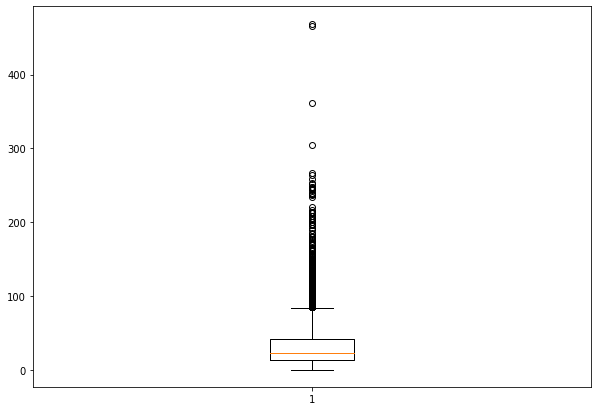

In [23]:
#Plot Box plot for len word in a review
data = np.array(l_len_word)
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

# **Preprocessing**
Remove StopWord and set max length sentence

Set top 30 stop word
Set max length = 200

In [24]:
#Reload data 
path_dataset = "/home/haiduong/Documents/DataScience-SentimentAnalysis/Clean Data/Merge_0-5k_20-25k.xlsx"
dataframe = pd.read_excel(path_dataset, sheet_name = 'Dataset')


In [27]:
# log_freq
MAX_LENGTH = 200

In [28]:
def remove_stop_word(sentence):
    for word in log_freq:
        sentence = sentence.replace(word,"")
    return sentence
def set_length_sentence(sentence):
    tmp = sentence.split(" ")
    if len(tmp) > MAX_LENGTH:
        tmp = tmp[:MAX_LENGTH]
    sentence = " ".join(tmp)
    return sentence

'Chao 50000 anh em toi'

In [33]:
l_convert_review = []
l_label = []
for index, row in dataframe.iterrows():
    review = str(row["Review"])
    print(review)
    label = int(row["Label"])
    un_stopword_review = remove_stop_word(review)
    review = set_length_sentence(un_stopword_review)
    print(review)
    l_convert_review.append(review)
    l_label.append(label)
    break


màu xanh khá lạ_mắt máy chính hãng mượt_mà camera không ấn_tượng lắm
u xanh khá lạ_mắt máy chính hãng mượt_ camera  ấn_tượng lắm
